<a href="https://colab.research.google.com/github/Sreelekshmi688582/project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd


In [2]:
df = pd.read_csv("taylor_swift_lyrics.csv", encoding= 'latin=1')

In [3]:
df.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [4]:
df.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [5]:
songs = df.groupby('track_title').agg({'lyric': lambda x: " " .join(x),'year': 'mean'}).reset_index()

In [6]:
songs.head()

,track_title,lyric,year
0,...Ready for It?,Knew he was a killer first time that I saw him...,2017
1,22,It feels like a perfect night to dress up like...,2012
2,A Perfectly Good Heart,Why would you wanna break a perfectly good hea...,2006
3,A Place In This World,"I don't know what I want, so don't ask me Caus...",2006
4,All Too Well,"I walked through the door with you, the air wa...",2012


In [7]:
len(songs)

94

In [8]:
artist = df[df['artist'] == 'artist-name']

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
import nltk
from nltk.corpus import stopwords

In [15]:
stop_words = stopwords.words('english')

In [16]:
stop_words.extend(['back','said','come','things','get','oh','one','yeah','place','would','like','know','stay','go','let','cause'])

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
Vectorizer=TfidfVectorizer(stop_words = stop_words,min_df = 0.1)

In [18]:
tfidf = Vectorizer.fit_transform(songs['lyric'])

In [19]:
from sklearn.decomposition import NMF

In [20]:
nmf = NMF(n_components=6)

In [21]:
topic_values = nmf.fit_transform(tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [22]:
for topic_num, topic in enumerate(nmf.components_):
     message = "Topic #{}: ".format(topic_num + 1)
     message += " ".join([Vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 :-1]])
     print(message)

Topic #1: love beautiful way never knew waiting feel say see
Topic #2: ever never getting remember still want see gonna could
Topic #3: wanna good first break feeling end way well miss
Topic #4: baby time sorry night bad see dancing every dreams
Topic #5: think gone dress hope head rain could better best
Topic #6: girl got home look tell long say want forever


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
topic_labels = ['love','memories','breakups','party','homesick','independence']

In [24]:
topic_values :

SyntaxError: ignored

In [25]:
df_topics = pd.DataFrame(topic_values,columns=topic_labels)
df_topics

,love,memories,breakups,party,homesick,independence
0,0.054088,0.090139,0.000000,0.463337,0.000000,0.000000
1,0.020682,0.000000,0.085171,0.265683,0.053030,0.000000
2,0.000000,0.000000,0.694579,0.000000,0.000000,0.000000
3,0.000000,0.032384,0.017131,0.000000,0.000000,0.466295
4,0.000000,0.190267,0.082060,0.071992,0.061535,0.150001
...,...,...,...,...,...,...
89,0.022612,0.030936,0.049269,0.239324,0.065268,0.038213
90,0.071423,0.164083,0.000000,0.030003,0.063226,0.241613
91,0.339101,0.000000,0.000000,0.000000,0.009268,0.108282
92,0.013369,0.116756,0.000000,0.335943,0.155257,0.044766


In [26]:
songs=songs.join(df_topics)

In [27]:
songs.head()

,track_title,lyric,year,love,memories,breakups,party,homesick,independence
0,...Ready for It?,Knew he was a killer first time that I saw him...,2017,0.054088,0.090139,0.000000,0.463337,0.000000,0.000000
1,22,It feels like a perfect night to dress up like...,2012,0.020682,0.000000,0.085171,0.265683,0.053030,0.000000
2,A Perfectly Good Heart,Why would you wanna break a perfectly good hea...,2006,0.000000,0.000000,0.694579,0.000000,0.000000,0.000000
3,A Place In This World,"I don't know what I want, so don't ask me Caus...",2006,0.000000,0.032384,0.017131,0.000000,0.000000,0.466295
4,All Too Well,"I walked through the door with you, the air wa...",2012,0.000000,0.190267,0.082060,0.071992,0.061535,0.150001


In [28]:
songs.loc[songs['love']>=0.1,'love']=1
songs.loc[songs['memories']>=0.1,'memories']=1
songs.loc[songs['breakups']>=0.1,'breakups']=1
songs.loc[songs['party']>=0.1,'party']=1
songs.loc[songs['homesick']>=0.1,'homesick']=1
songs.loc[songs['independence']>=0.1,'independence']=1


In [29]:
songs.loc[songs['love']<=0.1,'love']=0
songs.loc[songs['memories']<0.1,'memories']=0
songs.loc[songs['breakups']<0.1,'breakups']=0
songs.loc[songs['party']<0.1,'party']=0
songs.loc[songs['homesick']<0.1,'homesick']=0
songs.loc[songs['independence']<0.1,'independence']=0


In [ ]:
songs.head()

,track_title,lyric,year,love,memories,breakups,party,homesick,independence
0,...Ready for It?,Knew he was a killer first time that I saw him...,2017,1.0,1.0,1.0,1.0,1.0,1.0
1,22,It feels like a perfect night to dress up like...,2012,1.0,1.0,1.0,1.0,1.0,1.0
2,A Perfectly Good Heart,Why would you wanna break a perfectly good hea...,2006,1.0,1.0,1.0,1.0,1.0,1.0
3,A Place In This World,"I don't know what I want, so don't ask me Caus...",2006,1.0,1.0,1.0,1.0,1.0,1.0
4,All Too Well,"I walked through the door with you, the air wa...",2012,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
year_topics=songs.groupby('year').sum().reset_index()

In [32]:
year_topics

,love,memories,breakups,party,homesick,independence
year,,,,,,
2006,5.0,4.0,3.0,4.0,4.0,5.0
2008,4.0,3.0,2.0,9.0,4.0,3.0
2010,6.0,7.0,0.0,8.0,4.0,5.0
2012,5.0,7.0,2.0,8.0,5.0,5.0
2014,4.0,4.0,3.0,7.0,1.0,6.0
2017,3.0,3.0,5.0,5.0,5.0,4.0


In [33]:
import matplotlib.pyplot as plt

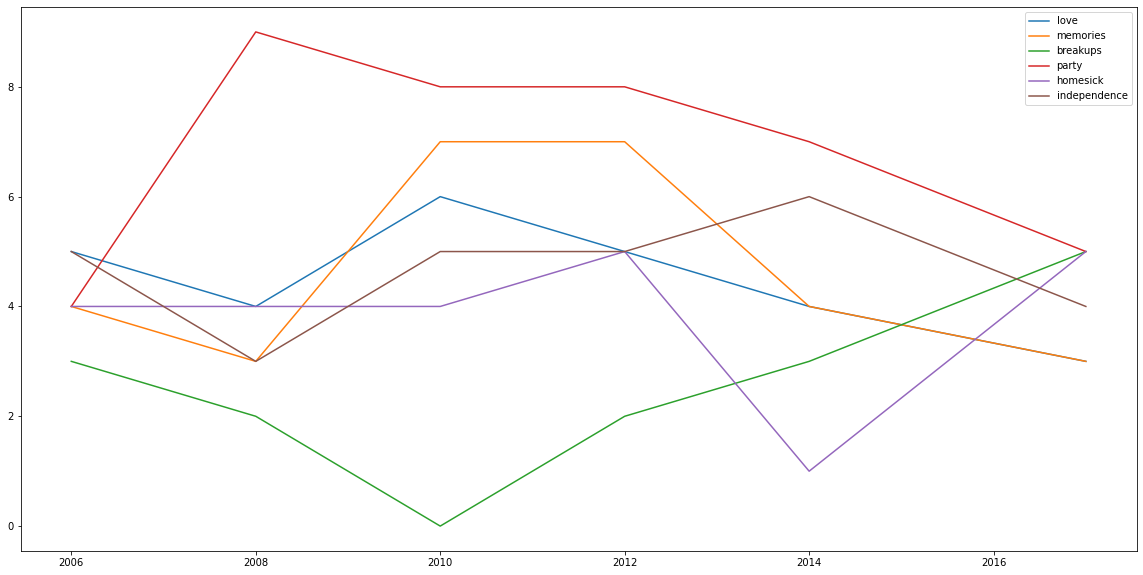

In [36]:
plt.figure(figsize=(20,10))
plt.plot(year_topics['year'],year_topics['love'],label = 'love')
plt.plot(year_topics['year'],year_topics['memories'],label='memories')
plt.plot(year_topics['year'],year_topics['breakups'],label='breakups')
plt.plot(year_topics['year'],year_topics['party'],label='party')
plt.plot(year_topics['year'],year_topics['homesick'],label='homesick')
plt.plot(year_topics['year'],year_topics['independence'],label='independence')
plt.legend()
